In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
crime = pd.read_csv('crime_data.csv')

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime1 = crime.rename(columns ={'Unnamed: 0' : 'Place'})

In [7]:
crime1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EXPLORATORY DATA ANALYSIS

In [8]:
crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime1.isna().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
crime1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## HIERARCHICAL CLUSTERING

In [11]:
# Normalization function
def norm_func (i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
# Normalized data frame 
df_norm = norm_func(crime1.iloc[:,1:]) 
df_norm.describe() 

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [13]:
# For creating dendogram 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [16]:
z= linkage(df_norm, method='complete',metric="euclidean")

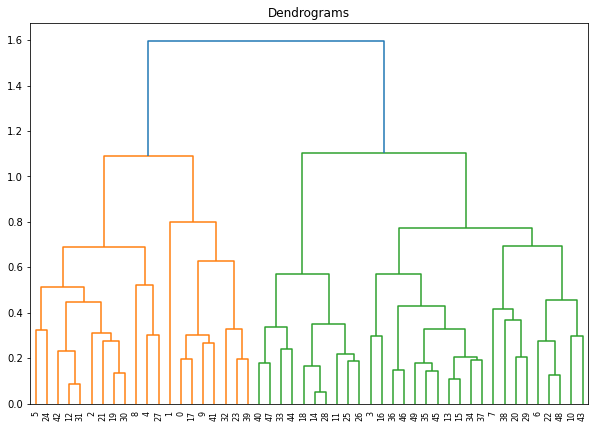

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='complete'))

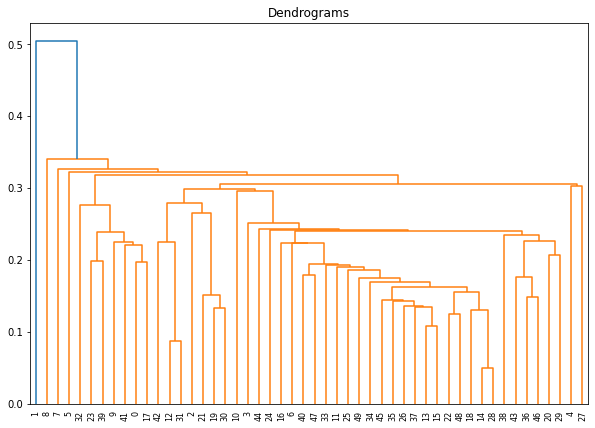

In [98]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='single'))

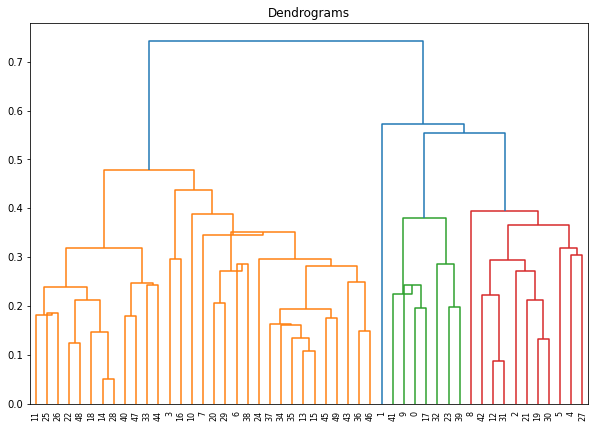

In [99]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='centroid'))

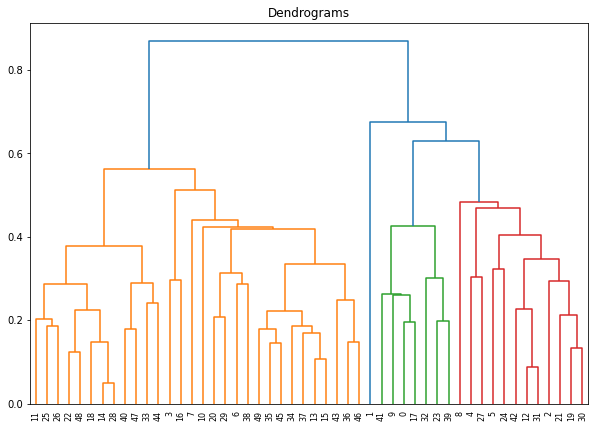

In [100]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='average'))

In [20]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

In [22]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean').fit(df_norm)  
h_complete.labels_

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [23]:
cluster_labels = pd.Series(h_complete.labels_)

In [28]:
crime1["clust"] = cluster_labels    # creating a new column and assigning it to new column
crime1

,Place,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [26]:
h_complete.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [27]:
h_complete

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [29]:
crime2=crime1.sort_values("clust")
crime2.iloc[:,[0,-1]]

,Place,clust
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


In [30]:
from sklearn.metrics import silhouette_score

In [32]:
sil_score= silhouette_score(df_norm, cluster_labels)
sil_score

0.3056360903608855

## K-MEANS

In [33]:
from sklearn.cluster import KMeans

In [35]:
crime2 =crime1.drop(['Place'], axis=1)

In [36]:
crime2.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [37]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [38]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime2.iloc[:, :])

In [39]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

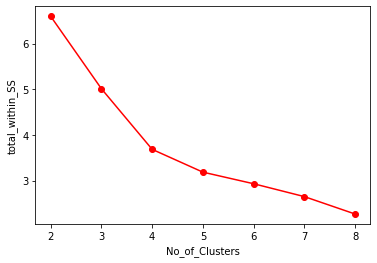

In [40]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [41]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 4) 
model.fit(crime_norm)

KMeans(n_clusters=4)

In [42]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime2['clust'] = mb # creating a  new column and assigning it to new column

In [43]:
crime2.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3


In [44]:
kmeans = KMeans(n_clusters=3,random_state=0)
predict=kmeans.fit_predict(crime_norm)

In [45]:
predict

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 2, 2], dtype=int32)

In [46]:
kmeans.inertia_

6.554548268088334

In [47]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime_norm)

KMeans(n_clusters=4, random_state=42)

In [48]:
dir(clusters_new)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',

In [59]:
# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(4, random_state=42)
clusters_new1.fit(crime_norm)

KMeans(n_clusters=4, random_state=42)

In [60]:
sil_score= silhouette_score(crime_norm, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.4735426458963329


In [61]:
crime2.groupby('clust').agg(['mean']).reset_index()

,clust,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.715000,132.300000,70.800000,18.1000
1,1,14.087500,252.750000,53.500000,24.5375
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


## DBSCAN

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [70]:
array=crime2.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   3. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   3. ],
       [  7.9, 204. ,  78. ,  38.7,   3. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   3. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   3. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   3. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   3. ],
       [  2.7,  72. ,  66. ,  14

In [71]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [73]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.23003427],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.23003427],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.41306768],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.05158525],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.41306768],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.41306768],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.05158525],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.05158525],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.41306768],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.23003427],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.05158525],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.5915167 ],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.41306768],
       [-0.13637203, -0.70012057, -0.0

In [81]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit_predict(X)

array([ 0, -1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0])

In [82]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0])

In [83]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [84]:
clustered = pd.concat([crime2,cl],axis=1)

In [85]:
clustered

,Murder,Assault,UrbanPop,Rape,clust,cluster
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,3,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,3,1
5,7.9,204,78,38.7,3,1
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,3,1
9,17.4,211,60,25.8,1,0


In [86]:
clustered[clustered['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,clust,cluster
1,10.0,263,48,44.5,1,-1


In [87]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
clust         1.280
cluster       0.220
dtype: float64

In [88]:
# silhouette score
sil_score= silhouette_score(X, dbscan.labels_)
sil_score

0.34277873703779416

# Inferences:-
# 1)"Clust - 0" has low crime rate.
# 2) "Clust - 1" has high crime rate.  
# There are 20 places among total 50 places have higher crime rate.  